## Code Submitted by: Chirag Verma

Given: $$\dot{x} = \frac{\sigma}{\gamma}\xi(t)$$
where $\gamma$ is the friction coefficient, $\sigma$ is the noise strength, and $\xi(t)$ is white noise <br>

To Plot: <br>
i. Trajectories as a function of time <br>
         ii. Mean squared displacement as a function of time

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The implementation of Euler-Maryuma integration is similar to the one provided to us.
def em_step(t, y, dt, f, G):
    
    DW = np.random.normal(size=len(y))    
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)


def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):            
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        y_list[i,:] = y
        
    return y_list

# No external force
def f(t,y):
    return 0

# Parameters for white noise
def G(t,y):
    gamma = 0.2
    sigma = 0.4
    return sigma/gamma

In [3]:
# Fixing the ensemble size [1, 2, 10, 100, 1000, 10000]

# Each walker starts from the origin as mentioned in the problem statement
y0 = [np.zeros(1), np.zeros(2), np.zeros(10), np.zeros(100), np.zeros(1000), np.zeros(10000)]

# Time domain of integration
t = np.linspace(0,1,100)
dt = 1e-4

# Solution
y = []
for i in range(len(y0)):
    y.append(eulermaruyama(t, y0[i], dt, f, G))


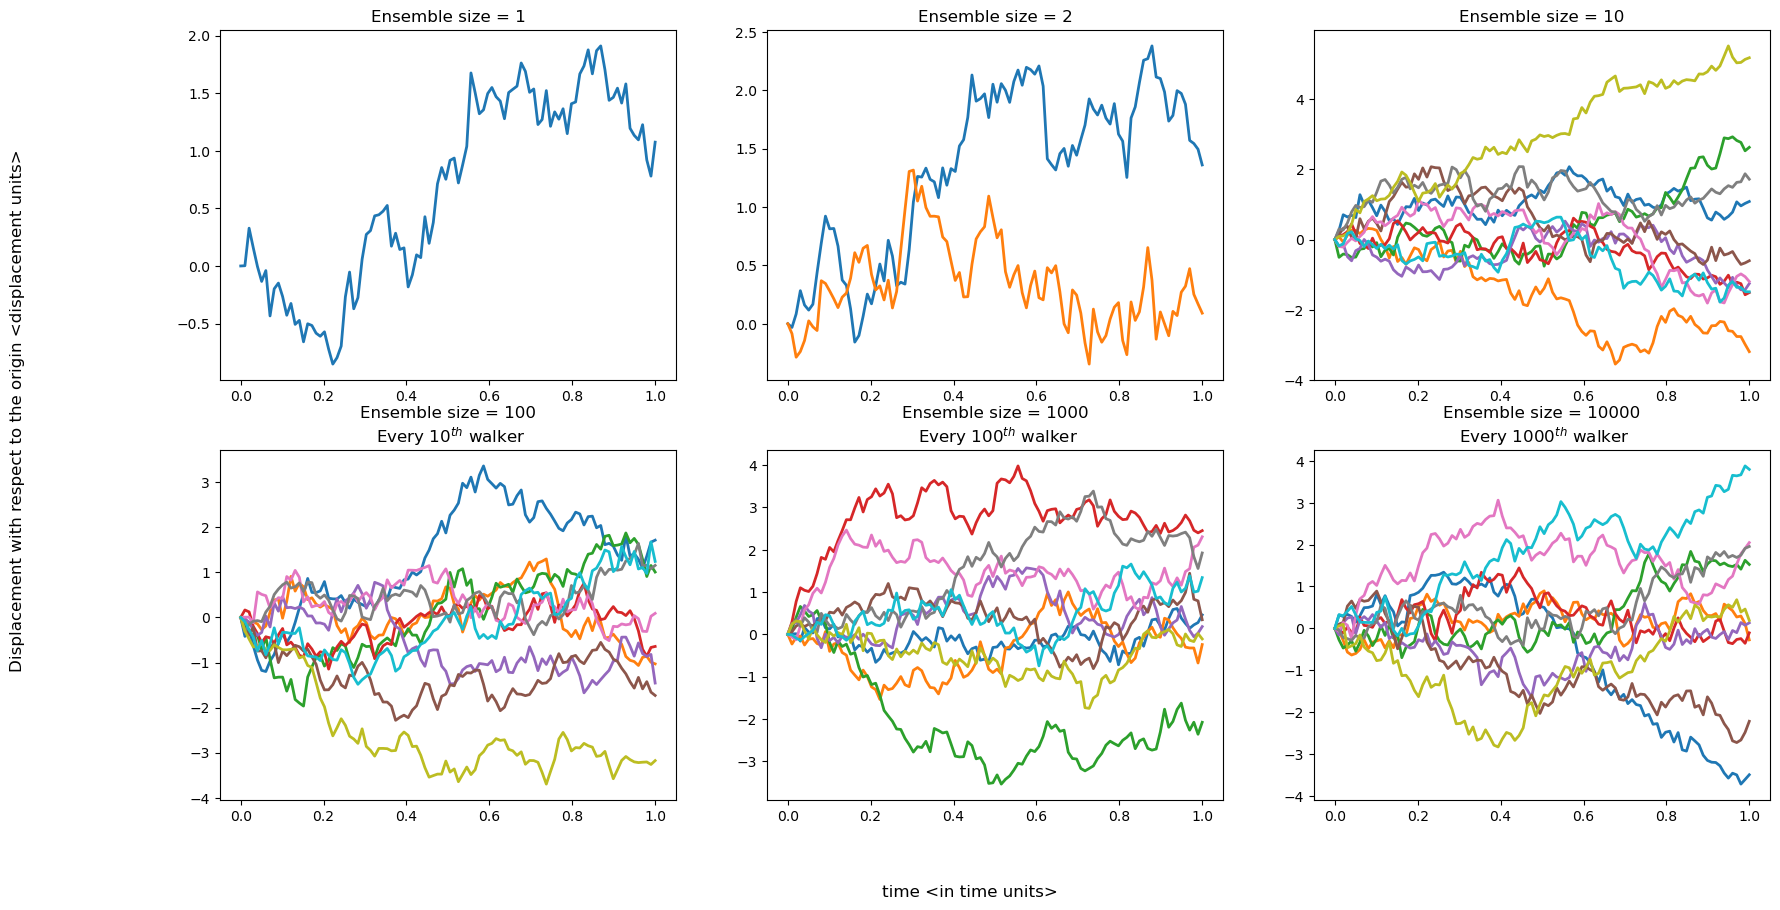

In [4]:
# Plotting the trajectories
fig1, ax1 = plt.subplots(2, 3, figsize = (20, 10))

for i in range(2):
    for j in range(3):
        if i == 0:
            ax1[i][j].plot(t, y[i+j][:, 0::], lw = "2");
            ax1[i][j].set_title("Ensemble size = %.1d"%len(y0[i+j]))
        else:
            ax1[i][j].plot(t, y[i+j+2][:, 0::int(10**(i+j))], lw = "2");
            ax1[i][j].set_title("Ensemble size = %.1d"%len(y0[i+j+2]) + "\n Every %.1d$^{th}$ walker"%10**(i+j))
            

fig1.supxlabel('time <in time units>');
fig1.supylabel('Displacement with respect to the origin <displacement units>');

In [5]:
# calculating the Mean Squared Displacement

msd = []
for i in range(len(y)):
    temp = y[i]**2
    msd.append(np.mean(temp, axis = 1))

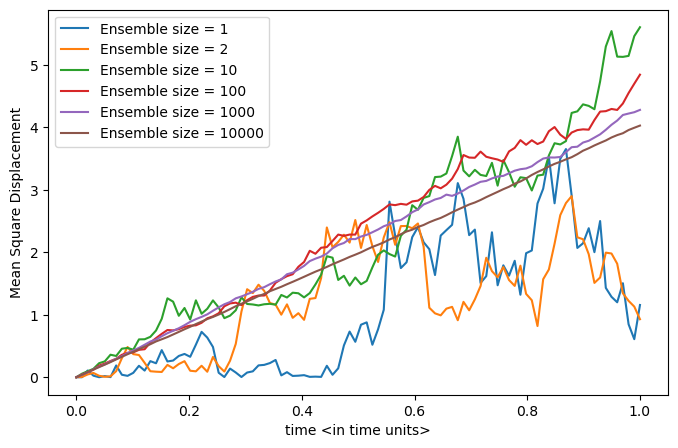

In [6]:
# Plotting the mean squared dispacement for diferent ensemble sizes

fig2, ax2 = plt.subplots(figsize=(8, 5))

for i in range(len(y)):
    ax2.plot(t, msd[i], label = "Ensemble size = %.1d"%len(y0[i]));
ax2.legend(loc = "best");
ax2.set_xlabel("time <in time units>");
ax2.set_ylabel("Mean Square Displacement");